In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path=Path('/content/drive/My Drive/audio_dataset')
path

PosixPath('/content/drive/My Drive/audio_dataset')

In [3]:
path.ls()

[PosixPath('/content/drive/My Drive/audio_dataset/real_img'),
 PosixPath('/content/drive/My Drive/audio_dataset/fake_img')]

In [4]:
get_transforms?

In [4]:
np.random.seed(2)
bs=64
tfms = get_transforms(do_flip= True ,flip_vert=False,max_rotate=0.0, max_zoom=0.0, max_lighting=0.0, max_warp= 0.0,   )

In [5]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2, size=256 ,ds_tfms=tfms, bs=bs).normalize(imagenet_stats)
data.c

2

/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


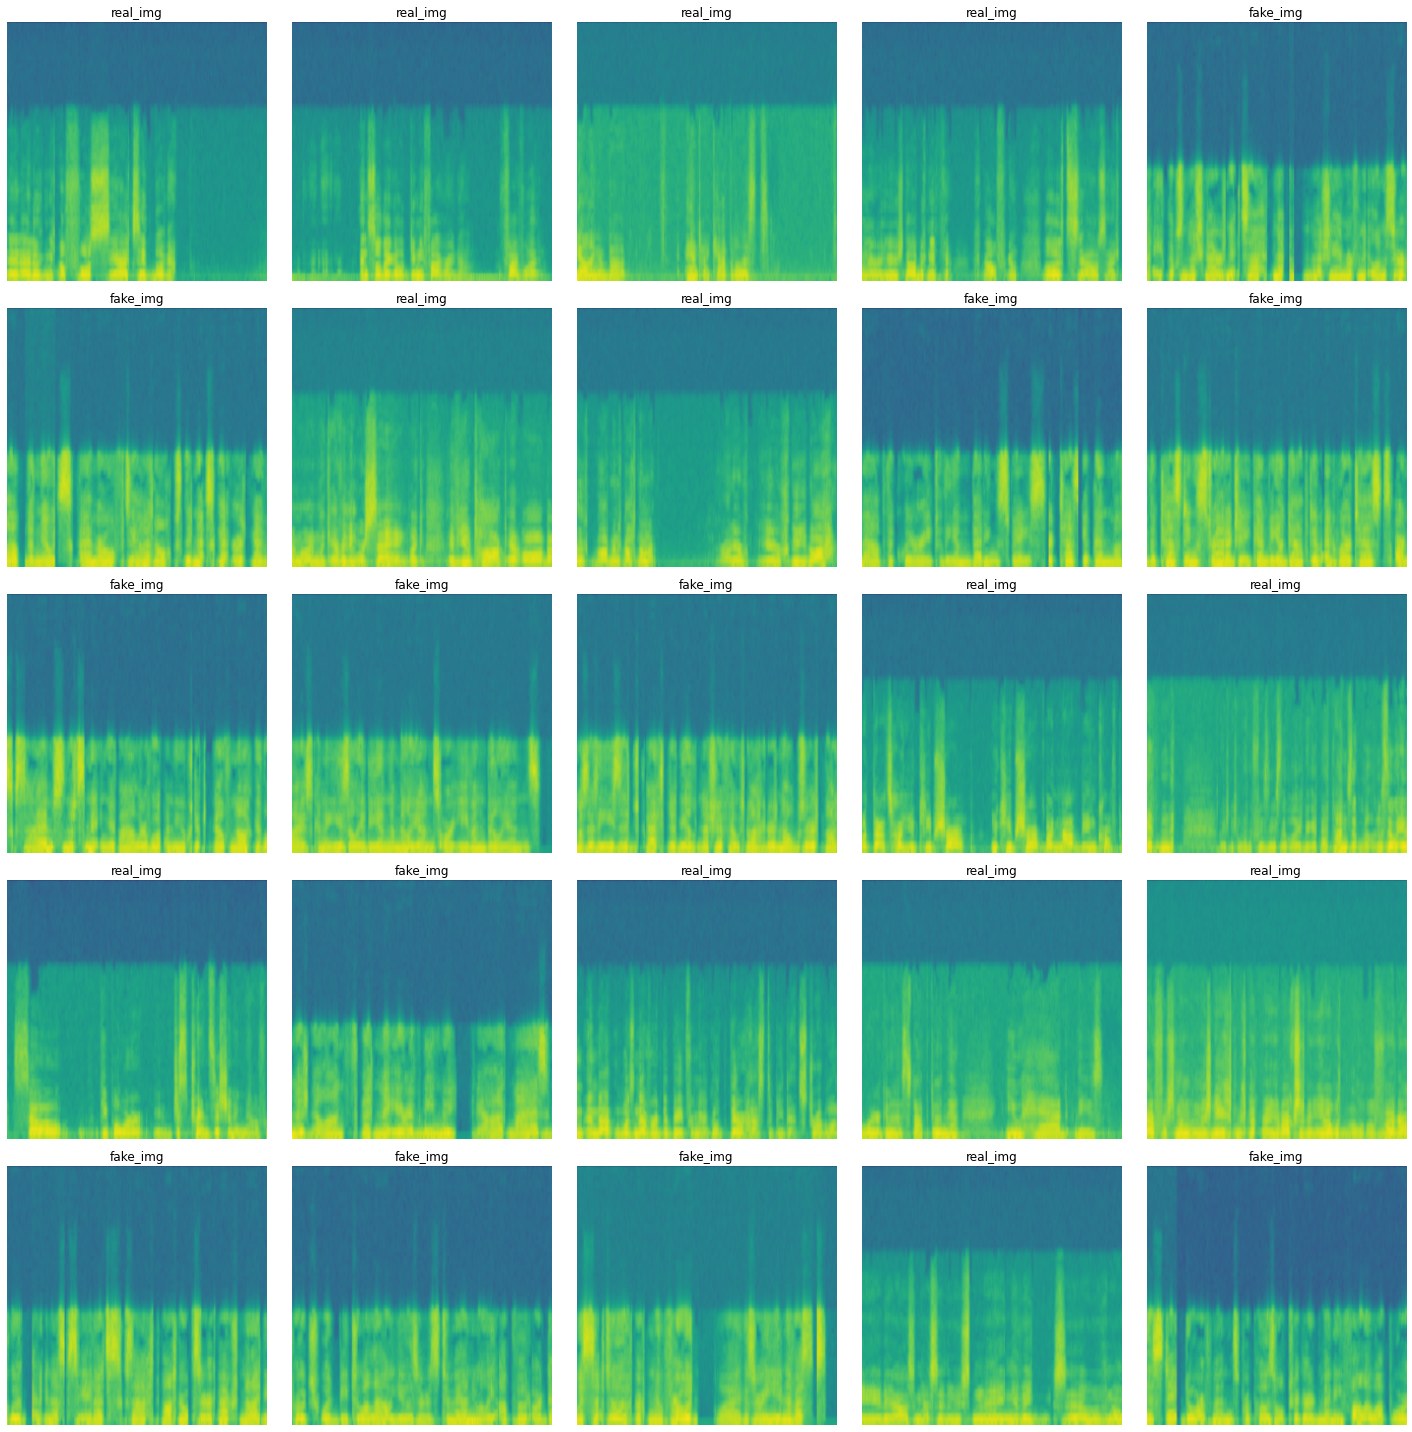

In [6]:
data.show_batch(rows=5)

In [7]:
learn = cnn_learner(data,models.resnet50, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [11]:
! ls /content/drive/My\ Drive/audio_dataset/real_img | wc -l

312


In [10]:
! ls /content/drive/My\ Drive/audio_dataset/fake_img | wc -l

309


In [12]:
learn.model_dir='/content/output'

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


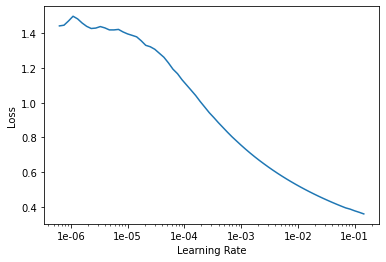

In [13]:
learn.lr_find()
learn.recorder.plot()


In [14]:
learn.fit_one_cycle(5,1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.281824,0.730153,0.475806,0.524194,00:59
1,0.840589,0.447514,0.250000,0.750000,00:07
2,0.551266,0.172779,0.080645,0.919355,00:07
3,0.402912,0.044266,0.008064,0.991935,00:07
4,0.309008,0.021440,0.008065,0.991935,00:07


In [15]:
learn.save('stage-1')

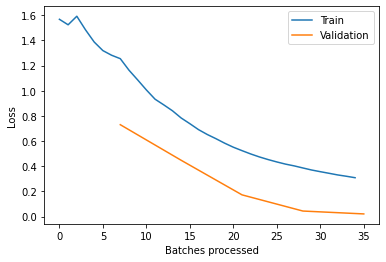

In [16]:
learn.recorder.plot_losses()

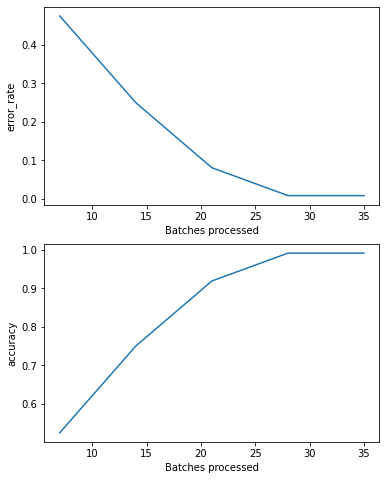

In [17]:
learn.recorder.plot_metrics()

In [19]:
learn.export('/content/output/export.pkl')

In [20]:
! cp -r /content/output /content/drive/My\ Drive/

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

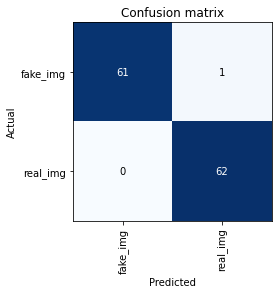

In [22]:
interp.plot_confusion_matrix()